<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [1]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

zsh:1: command not found: gdown


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df = pd.read_csv('diabetes.csv')

In [56]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [57]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,754.000000,768.000000,768.000000,760.000000,768.000000,758.000000,768.000000,768.000000,768.000000
mean,3.864721,120.894531,69.105469,20.536842,79.799479,31.962533,0.471876,33.240885,0.348958
std,3.373635,31.972618,19.355807,15.971606,115.244002,7.895003,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.225000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

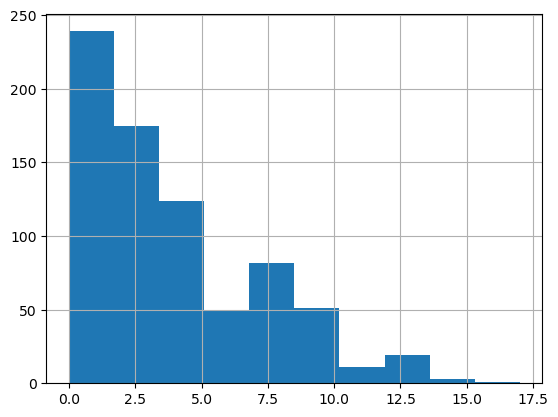

In [58]:
df['Pregnancies'].hist()

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [59]:
#add your code
df.isnull().sum()

Pregnancies                 14
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [60]:
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index":"column", 0: "percent missing"})
missing_percent

,column,percent missing
0,Pregnancies,1.822917
1,Glucose,0.000000
2,BloodPressure,0.000000
3,SkinThickness,1.041667
4,Insulin,0.000000
5,BMI,1.302083
6,DiabetesPedigreeFunction,0.000000
7,Age,0.000000
8,Outcome,0.000000


## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

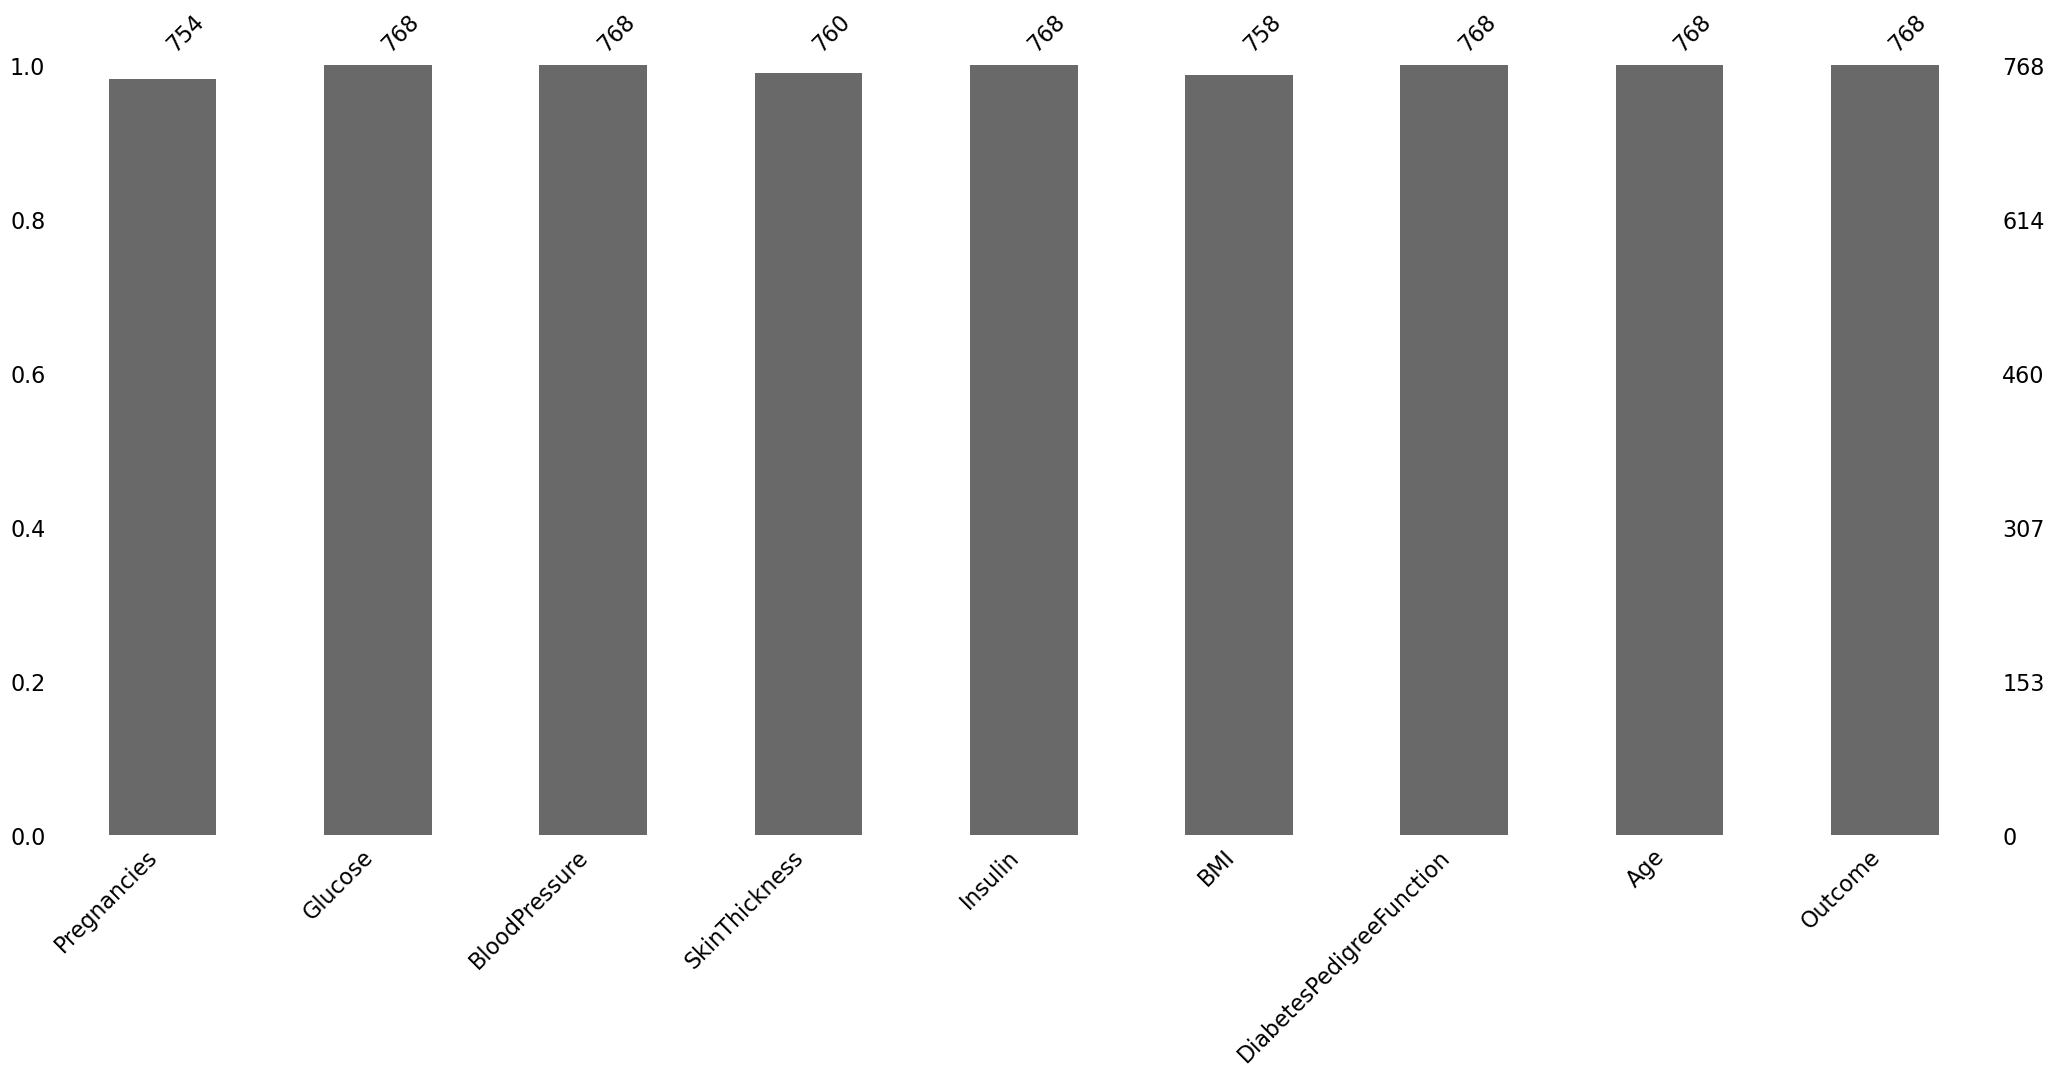

In [61]:
#add your code
msno.bar(df)
plt.show()

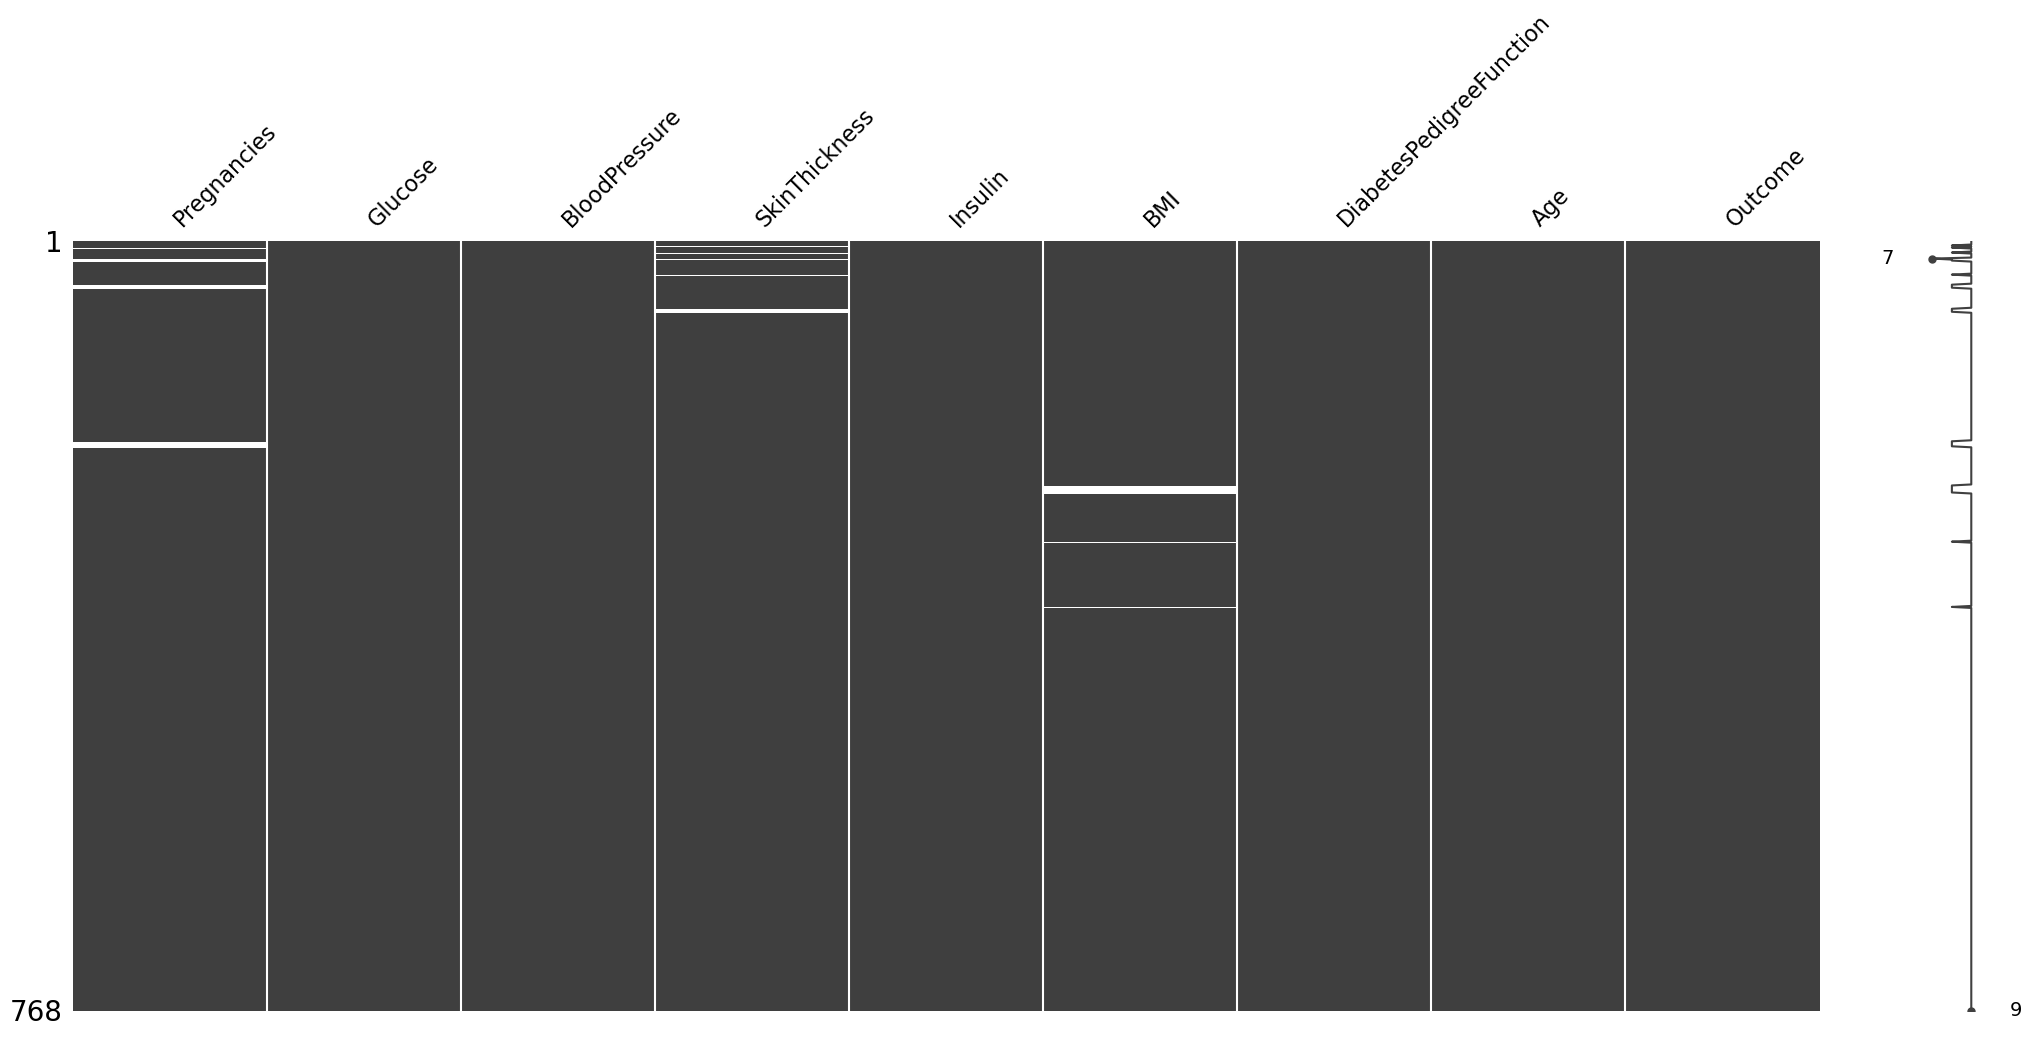

In [62]:
msno.matrix(df)
plt.show()

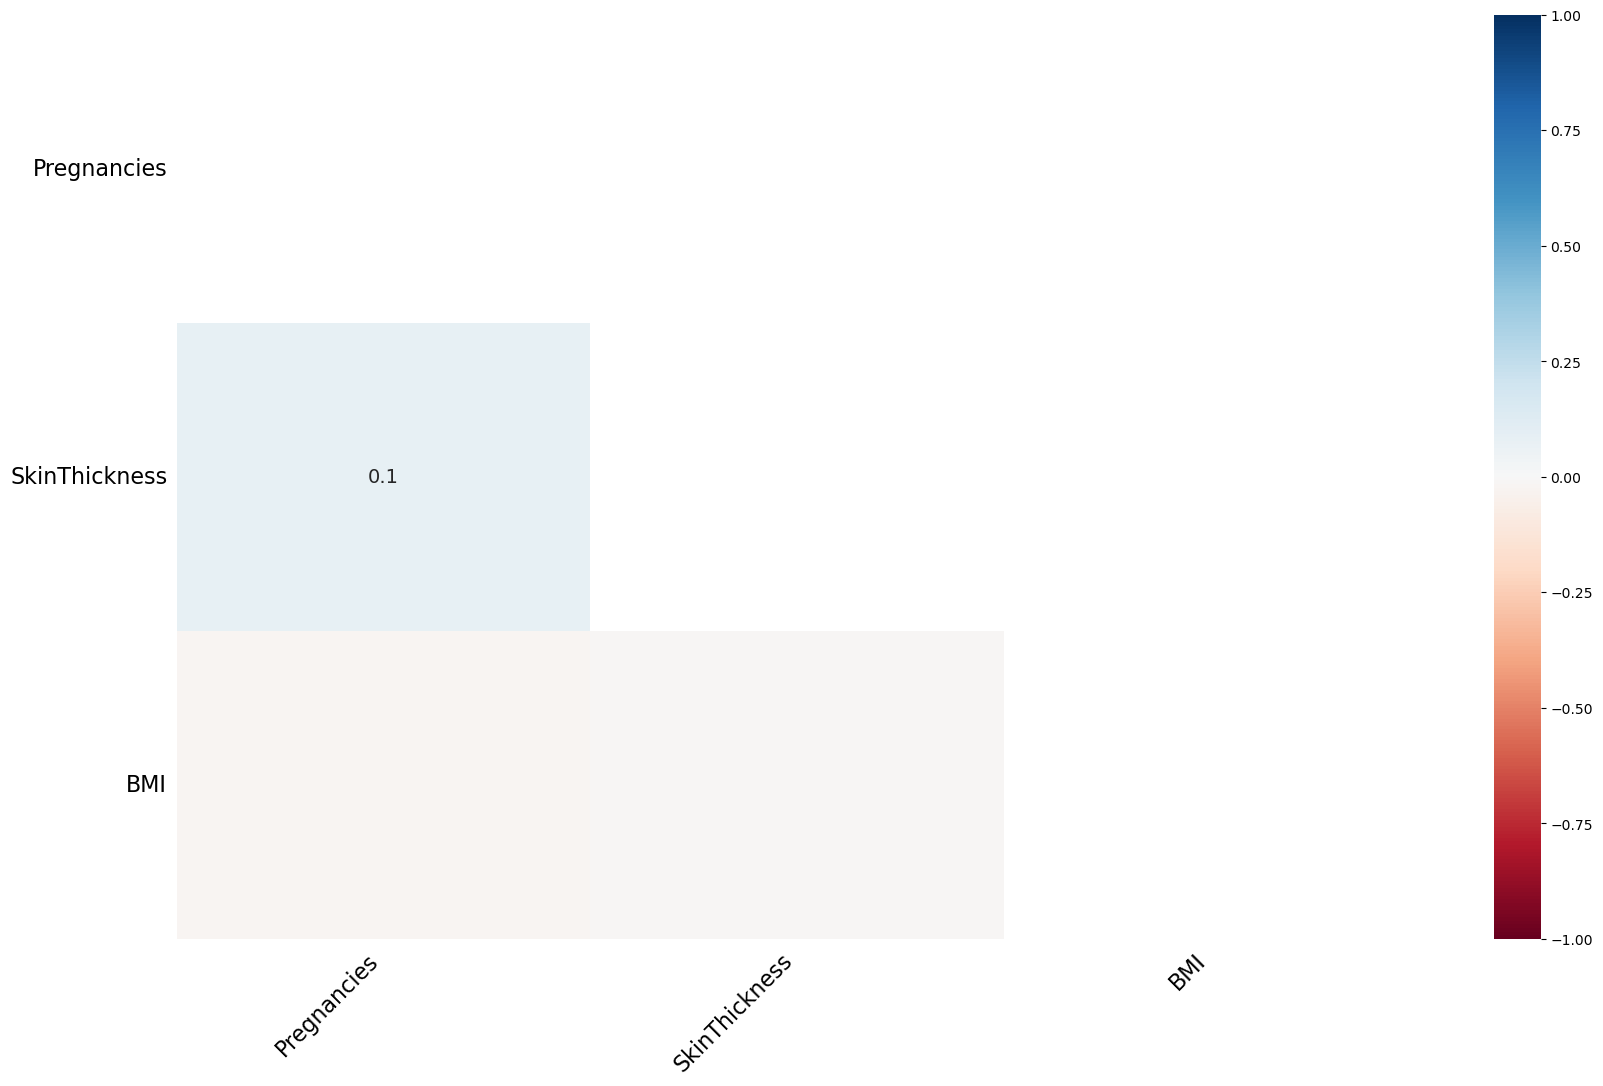

In [63]:
msno.heatmap(df)
plt.show()

In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,754.000000,768.000000,768.000000,760.000000,768.000000,758.000000,768.000000,768.000000,768.000000
mean,3.864721,120.894531,69.105469,20.536842,79.799479,31.962533,0.471876,33.240885,0.348958
std,3.373635,31.972618,19.355807,15.971606,115.244002,7.895003,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.225000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


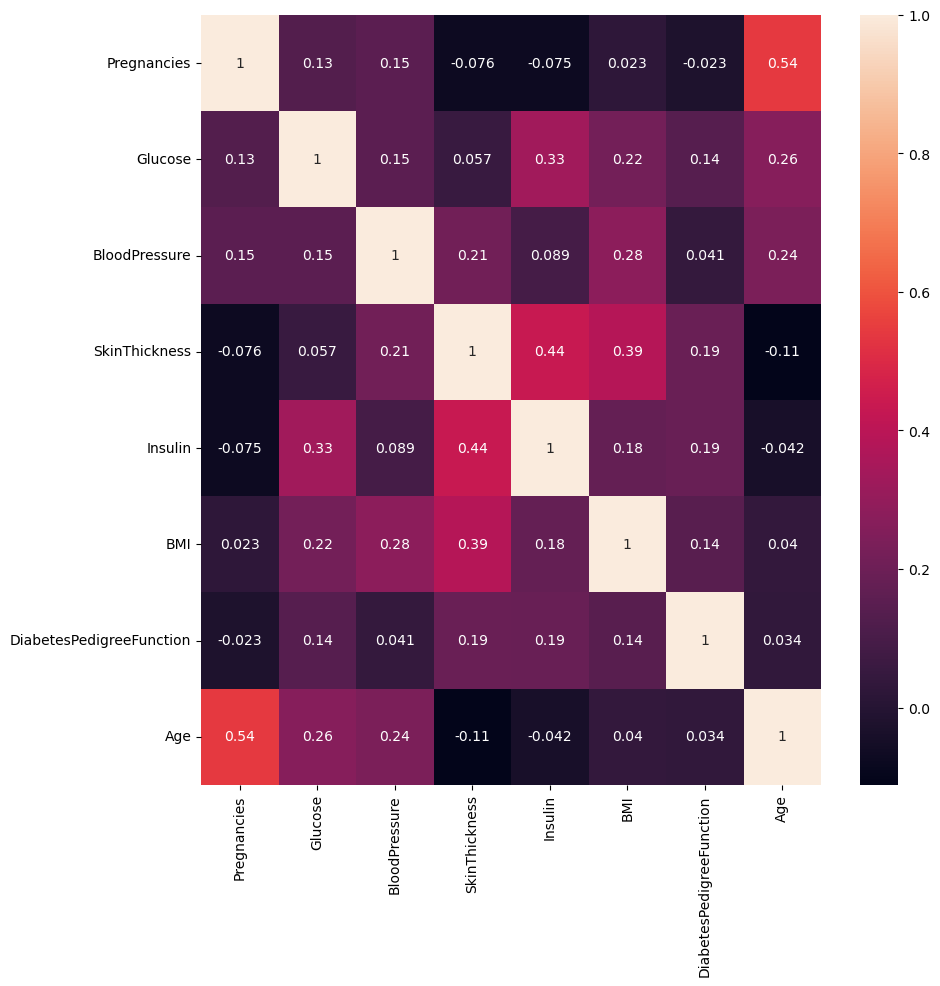

In [83]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].corr(), annot=True)
plt.show()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.130937,0.151087,-0.075894,-0.075459,0.023288,-0.022958,0.543260
Glucose,0.130937,1.000000,0.152590,0.057357,0.331357,0.217499,0.137337,0.263514
BloodPressure,0.151087,0.152590,1.000000,0.211725,0.088933,0.280616,0.041265,0.239528
SkinThickness,-0.075894,0.057357,0.211725,1.000000,0.435450,0.385878,0.190031,-0.111659
Insulin,-0.075459,0.331357,0.088933,0.435450,1.000000,0.177614,0.185071,-0.042163
BMI,0.023288,0.217499,0.280616,0.385878,0.177614,1.000000,0.142453,0.039816
DiabetesPedigreeFunction,-0.022958,0.137337,0.041265,0.190031,0.185071,0.142453,1.000000,0.033561
Age,0.543260,0.263514,0.239528,-0.111659,-0.042163,0.039816,0.033561,1.000000


## <font color = 'Orange'>Handle the missing values</font>

In [65]:
#add your code
from sklearn.impute import SimpleImputer

In [66]:
df.isnull().sum()

Pregnancies                 14
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

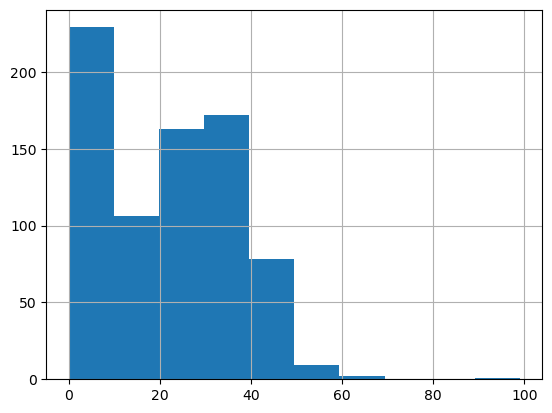

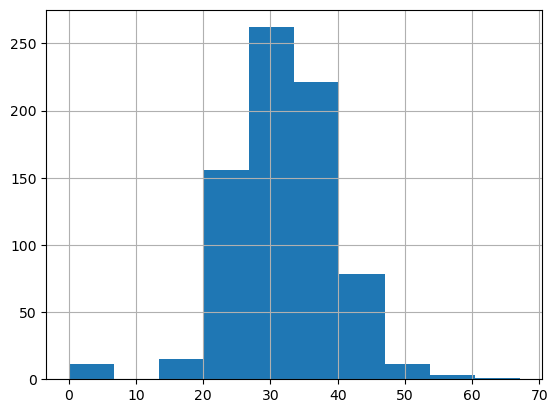

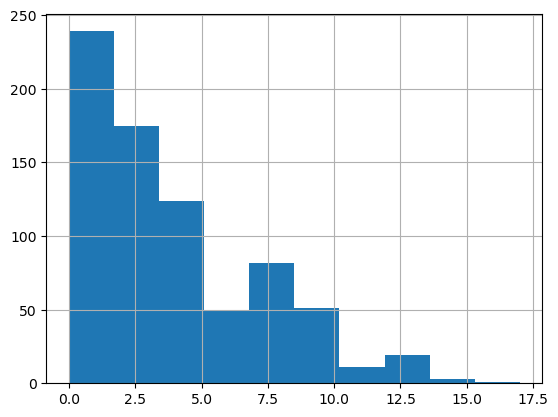

In [67]:
df['SkinThickness'].hist()
plt.show()
df['BMI'].hist()
plt.show()
df['Pregnancies'].hist()
plt.show()

Since the BMI column has a normal distribution, we can fill missing values with the mean

Since the other two columns are skewed, we can use median fill

In [68]:
df.fillna({'Pregnancies': df['Pregnancies'].median(),
           'SkinThickness': df['SkinThickness'].median(),
           'BMI': df['BMI'].mean()}, inplace=True)

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [69]:
df.to_csv("dataset-nomissing.csv")

Print the first rows of your final Dataset

In [70]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


In [71]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df.drop("Outcome", axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [77]:
#add your code
model = KNeighborsClassifier()

model.fit(X_train, y_train)

KNeighborsClassifier()

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [78]:
predictions = model.predict(X_test)

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [79]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)

print("Accuracy", accuracy)
print("f1", f1)
print("Recall", recall)
print("Precision", precision)

Accuracy 0.6688311688311688
f1 0.5641025641025641
Recall 0.6
Precision 0.532258064516129
